# About the Data Set:
- Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.--

- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
#Import the standard libaries for data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data using the pandas read function
data=pd.read_csv('C://Users//Admin//Downloads//loan_prediction//loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Checking the data shape
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [5]:
#Checking the stastical 
data.describe().style.background_gradient(cmap='rainbow')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,65.120410,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

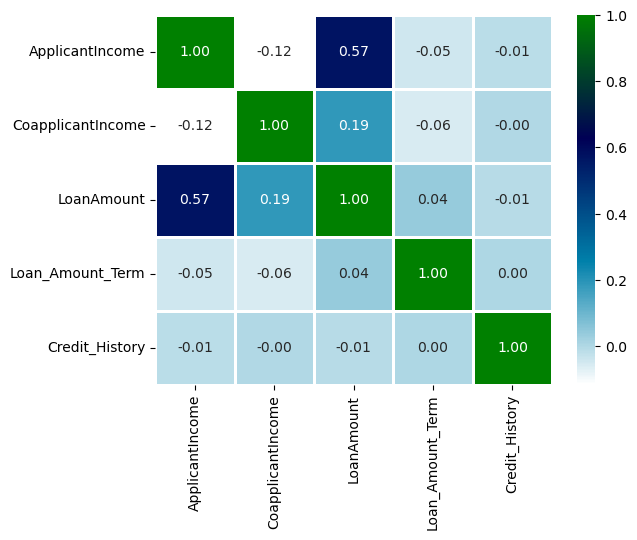

In [6]:
#Visualize the heatmap understanding the correlation
sns.heatmap(data.corr(),annot=True,cmap='ocean_r',fmt='.2f',linewidths=1,linecolor='white')

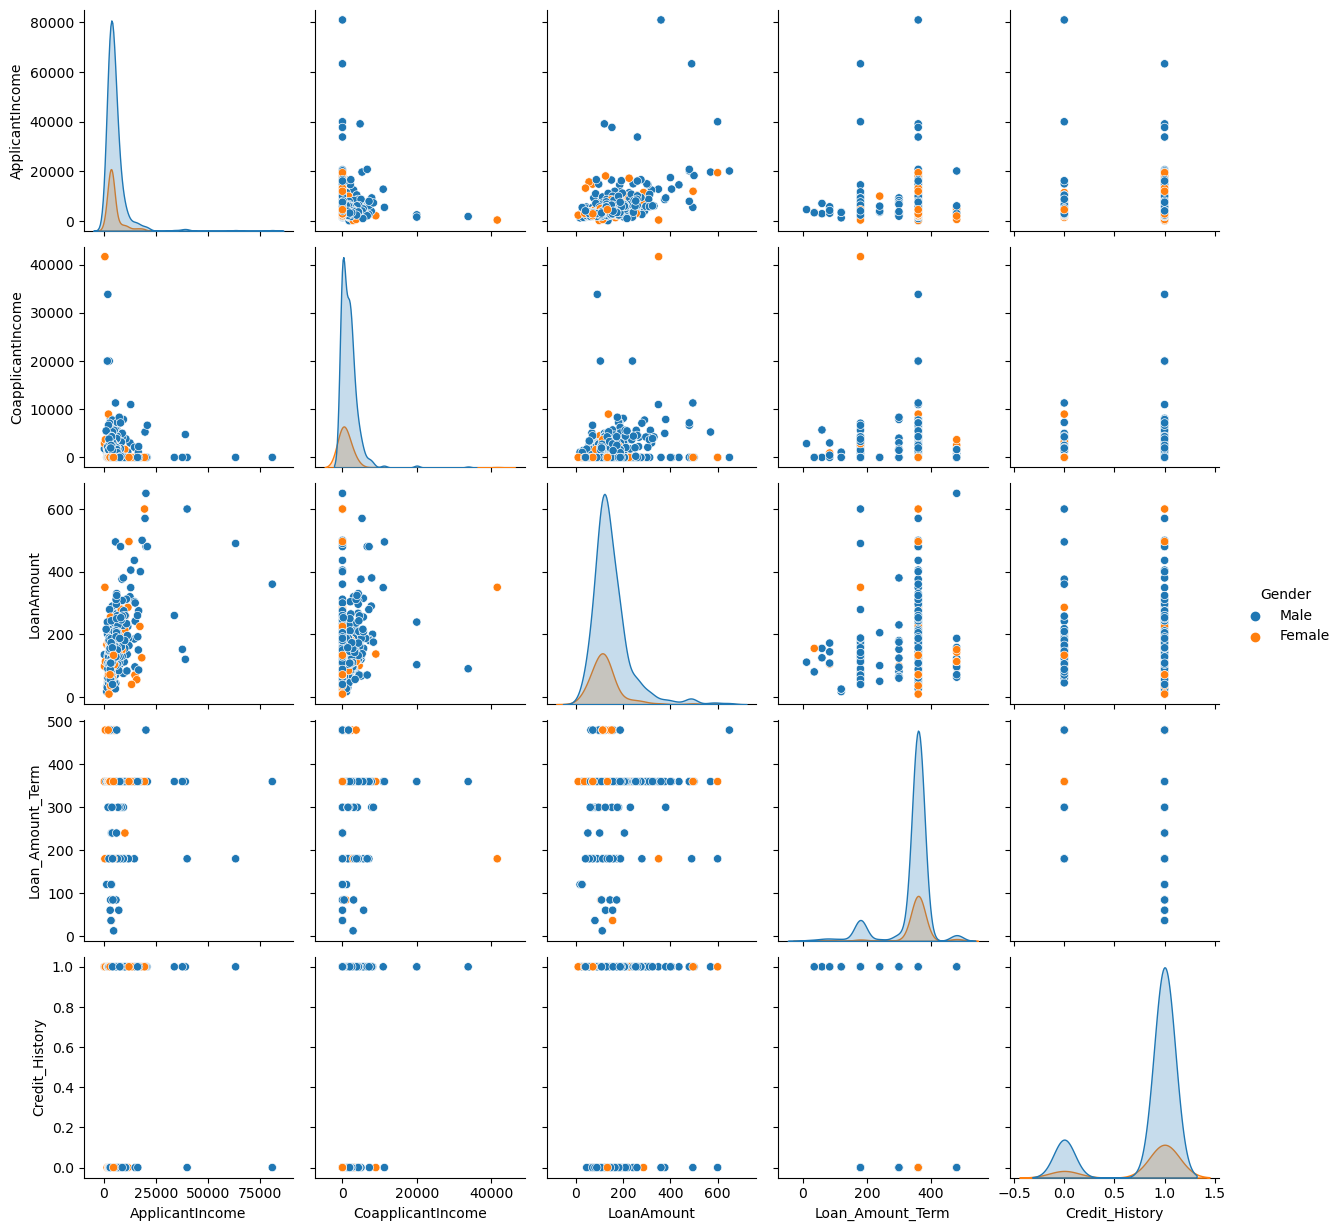

In [7]:
sns.pairplot(data,hue='Gender')

In [9]:
#checking the null values in the dataset
null_val=[col for col in data.columns if data[col].isna().sum() >0 ]
null_col=data[null_val].isna().sum().sort_values(ascending=False)
ratio=(data[null_val].isna().sum()/data.shape[0]*100).sort_values(ascending=False)
result=pd.concat([null_col,np.round(ratio,2)],axis=1,keys=['Null_columns','Percentage'])
dataframe=pd.DataFrame(result)
dataframe.style.background_gradient(cmap='gist_stern_r')

,Null_columns,Percentage
Credit_History,50,8.140000
LoanAmount,22,3.580000
Loan_Amount_Term,14,2.280000


### Fill the null values with theier respective values 

In [10]:
#if the  numerical columns is fill with the mean values and categorical columns with mode values
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [11]:
#Again we check the null values in the data 
data.isna().sum()/len(data)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### Covert the data into the correct dtypes with the respective values

In [11]:
#In the code we replace the value with integres and convert their dtypes into the interger
data['Dependents'].replace(to_replace=['3+'],value=['3'],inplace=True)
data['Dependents']=data['Dependents'].astype(int)

# Explore Data Analysis with data
- Identify the Percentage of Gender in the data set using the pie chart
- Visualize the Scatter plot between with applicantincome and loan amount with Gender data
- Visualize the histogram with loan amount with Education 
- Another histogram Applicant income with Gender

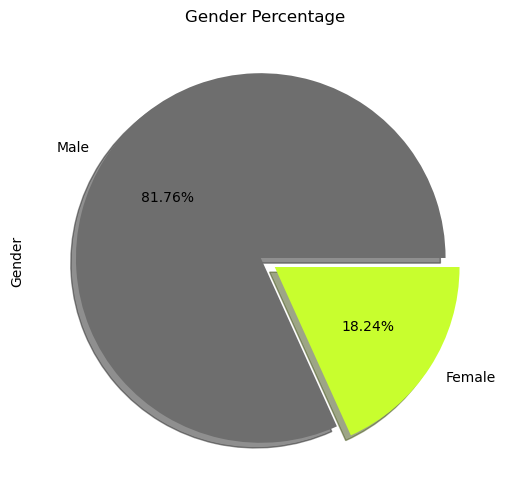

In [12]:
#Visualize the gender percentage in the data
data['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(8,6),title="Gender Percentage",explode=[0.03,0.06],
    labels=['Male','Female'],
    colors=['#6E6E6E','#C8FE2E'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

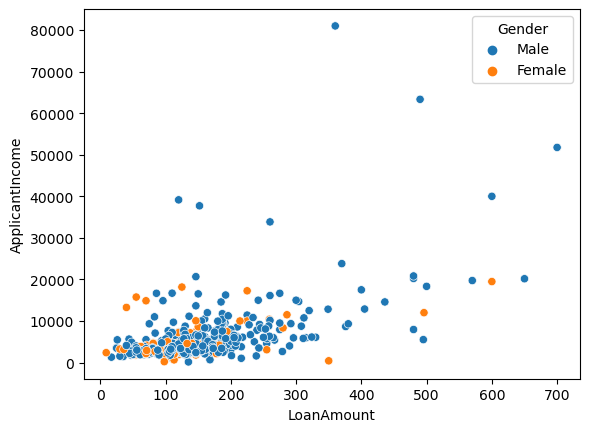

In [13]:
#Visualize the scatterplot with loan amount and applicantincome with gender 
sns.scatterplot(data=data,x='LoanAmount',y='ApplicantIncome',hue='Gender')

In [14]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

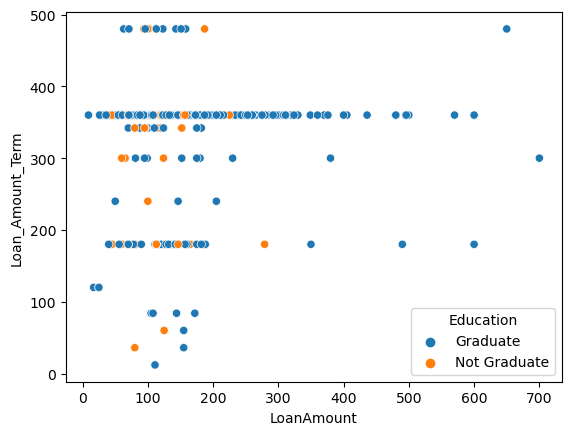

In [15]:
#Visualize the scatterplot with loan amount and Loan_Amount_Term with gender 
sns.scatterplot(data=data,x='LoanAmount',y='Loan_Amount_Term',hue='Education')

### Observations:
- From the Above pie chart most of the male candidates in the data set
- In the Scatterplot We find the relation between the loanamount and applicantincome with gender columns
- In the Scatterplot most of the male loan amount range 0 to 400 and applicant income should be 1000 in the chart

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

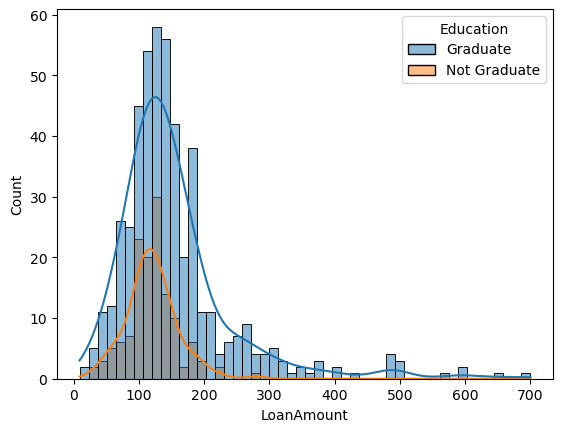

In [16]:
#Visualize Loanamount using the histogram and viusualize with education 
sns.histplot(data=data,x="LoanAmount",hue="Education",stat='count',bins=50,color='r',kde=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

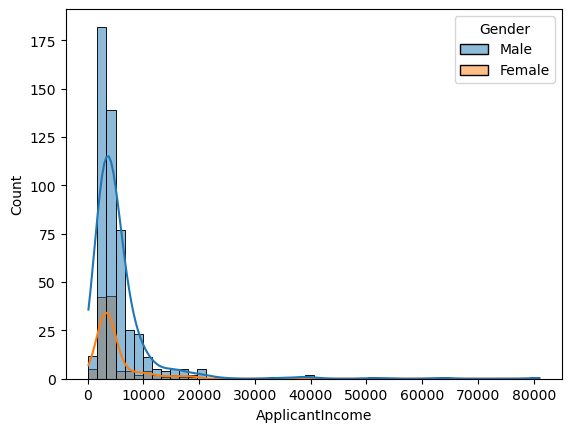

In [17]:
#Visualize ApplicantIncome using the histogram and viusualize with Gender 
sns.histplot(data=data,x="ApplicantIncome",hue="Gender",bins=50,color='r',kde=True)

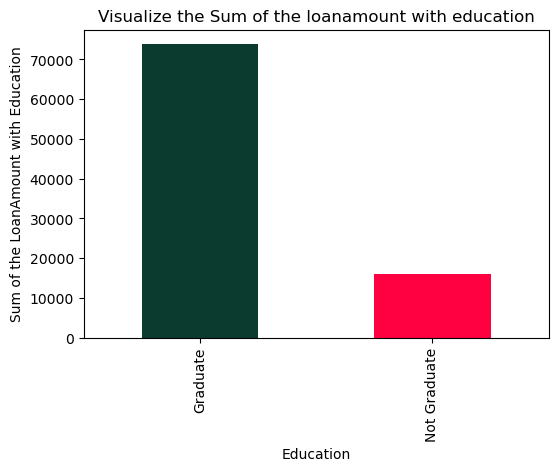

In [18]:
#Visualize the Loanamount with education and visualize with bar chart
data.groupby('Education')['LoanAmount'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(6,4),title="Visualize the Sum of the loanamount with education",color=['#0B3B2E','#FF0040'])
plt.xlabel("Education")
plt.ylabel("Sum of the LoanAmount with Education")
plt.show()

## Observations:
- From the Above three chart two are histogram and bar chats
- The First histogram the loanamount with Education.In the chart the most amount lies between 0 to 400
- Second chart we visualize Applicantincome with Gender.The income shoud lies between 0 to 20000
- In the bar chart Graduate people get more loan amount.

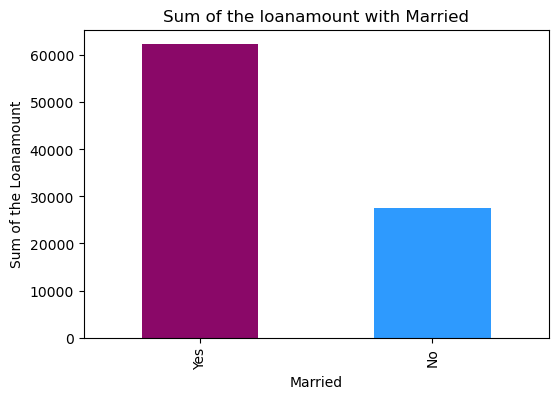

In [19]:
#Find the Sum of the loan amount for married persons
data.groupby('Married')['LoanAmount'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(6,4),title="Sum of the loanamount with Married",color=['#8A0868','#2E9AFE'])
plt.xlabel("Married")
plt.ylabel("Sum of the Loanamount")
plt.show()

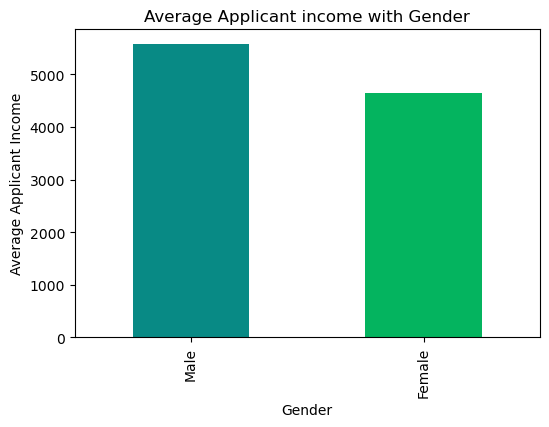

In [20]:
#Find the Average Applicant income with Gender wise
data.groupby('Gender')['ApplicantIncome'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(6,4),title='Average Applicant income with Gender',color=['#088A85','#04B45F'])
plt.xlabel("Gender")
plt.ylabel("Average Applicant Income")
plt.show()

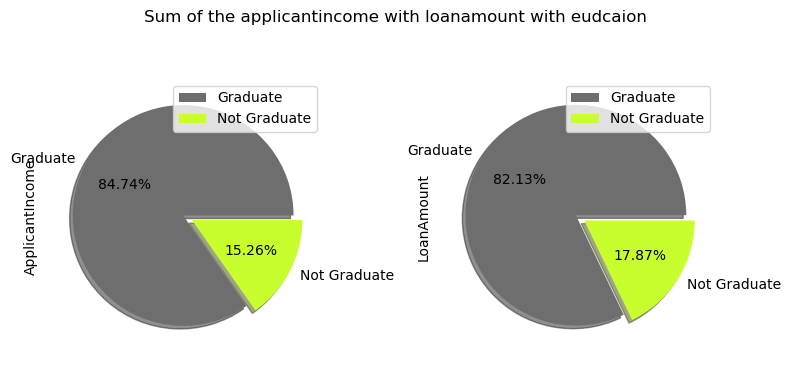

In [21]:
#Sum of the Applicaniincome with loanamount with education 
data.groupby('Education')[['ApplicantIncome','LoanAmount']].sum()\
.plot(kind='pie',subplots=True,figsize=(8,4),title="Sum of the applicantincome with loanamount with eudcaion",explode=[0.03,0.06],
    labels=['Graduate','Not Graduate'],
    colors=['#6E6E6E','#C8FE2E'],
    autopct='%1.2f%%',
    shadow=True)
plt.tight_layout()
plt.show()

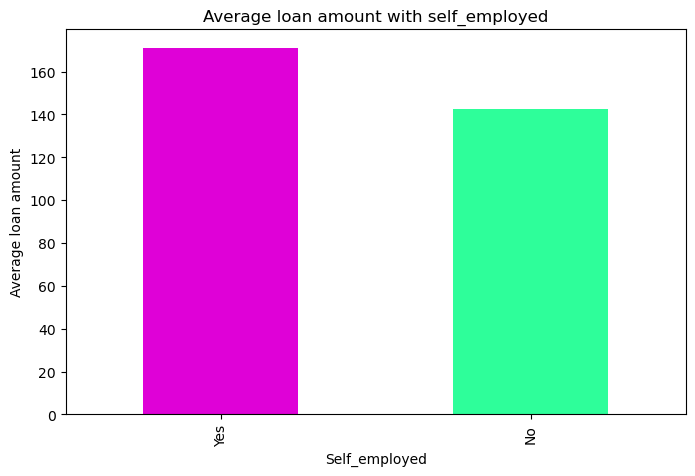

In [22]:
#Find the average loan amount with self_employed
data.groupby('Self_Employed')['LoanAmount'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,5),title="Average loan amount with self_employed",color=['#DF01D7','#2EFE9A'])
plt.xlabel("Self_employed")
plt.ylabel("Average loan amount")
plt.show()

## Observations:
- From the Above four charts we observed some intresting insights
- In the Bar chart most of the married persons recevied high loan amount compare to the not married persons
- Second bar chart male person get more average applicatincome compare to the female
- In the pie charts Graduate person have high amount in the applicant income and loan amount compare to the non graduates
- Again the Bar Chart self_employed recevied more loan amount compare to the non self_employedd

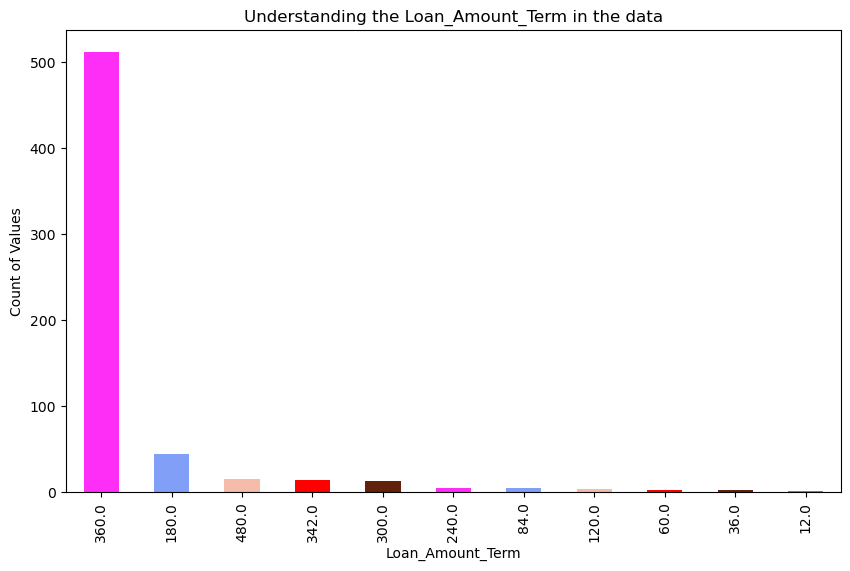

In [27]:
#create bar chart with Loan_Amount_Term in the data
data['Loan_Amount_Term'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,6),title="Understanding the Loan_Amount_Term in the data",color=['#FE2EF7','#819FF7','#F5BCA9','#FF0000','#61210B'])
plt.xlabel("Loan_Amount_Term")
plt.ylabel("Count of Values")
plt.show()

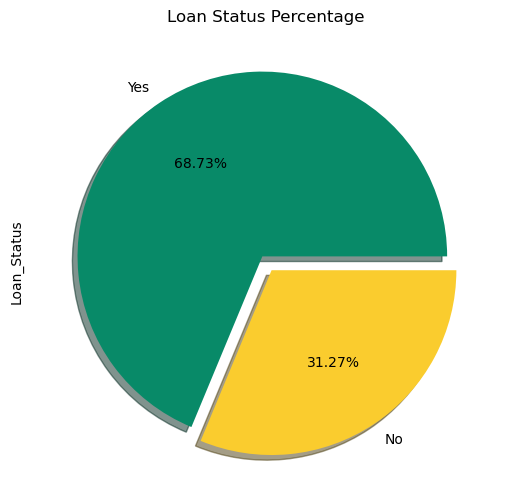

In [23]:
#Create a pie chart understanding the output variable percentage
data['Loan_Status'].value_counts()\
.plot(kind='pie',figsize=(6,6),title="Loan Status Percentage",explode=[0.03,0.06],
    labels=['Yes','No'],
    colors=['#088A68','#FACC2E'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

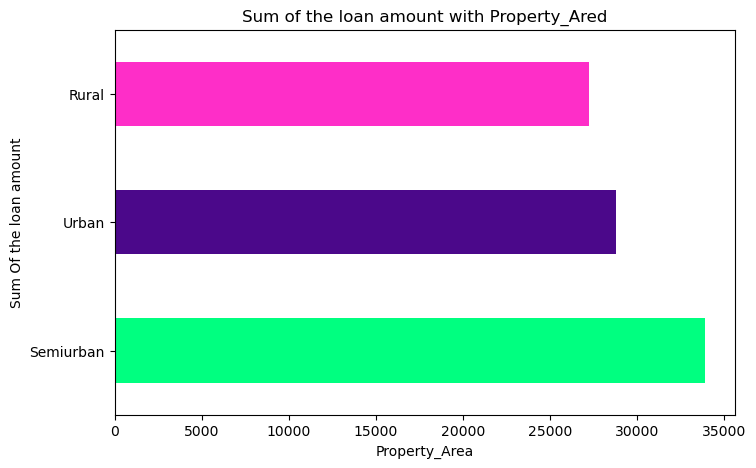

In [24]:
#Find the Sum of the loan amount with the Property Areas
data.groupby('Property_Area')['LoanAmount'].sum().sort_values(ascending=False)\
.plot(kind='barh',figsize=(8,5),title="Sum of the loan amount with Property_Ared",color=['#00FF80','#4B088A','#FE2EC8'])
plt.xlabel("Property_Area")
plt.ylabel("Sum Of the loan amount")
plt.show()

In [25]:
#Find the Graduate avearage income  
education=data['Education']=='Graduate'
graduate_average_income=data.loc[education]['ApplicantIncome'].mean()
print(f'The Graduate Average income is {graduate_average_income*100:.2f} ')
#Find the Average applicant income of the urban areas 
average_urban=data.groupby('Property_Area')['ApplicantIncome'].mean().loc['Urban']
print(f'The Average Applicantincome of the urban areas is {average_urban*100:.2f}')

The Graduate Average income is 585743.33 
The Average Applicantincome of the urban areas is 539824.75


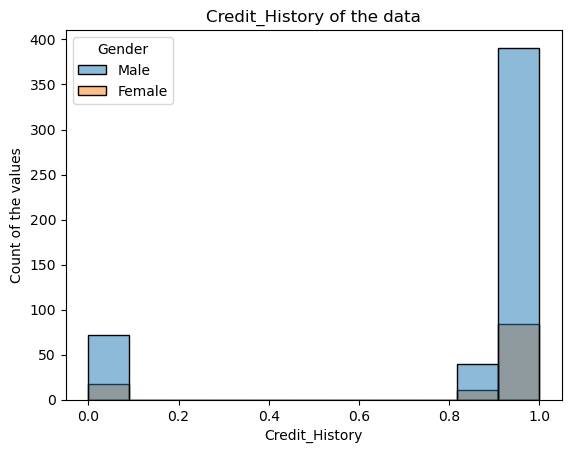

In [26]:
#Find the Credit_History range based on the plots
sns.histplot(data,x='Credit_History',hue='Gender')
plt.title("Credit_History of the data")
plt.xlabel("Credit_History")
plt.ylabel("Count of the values")
plt.show()

## Observations:
- From the Bar chart most of loan_tearm is 360 terms and 180 second place with loan term
- From the Above pie chart most of percentage people recevied loan status compare to loan reject
- In the Second chart Semiurbun area people ger more loan amount compare to the urban areas
- In the Credit_history lies between 0 and 0.8 and 1.0 values 


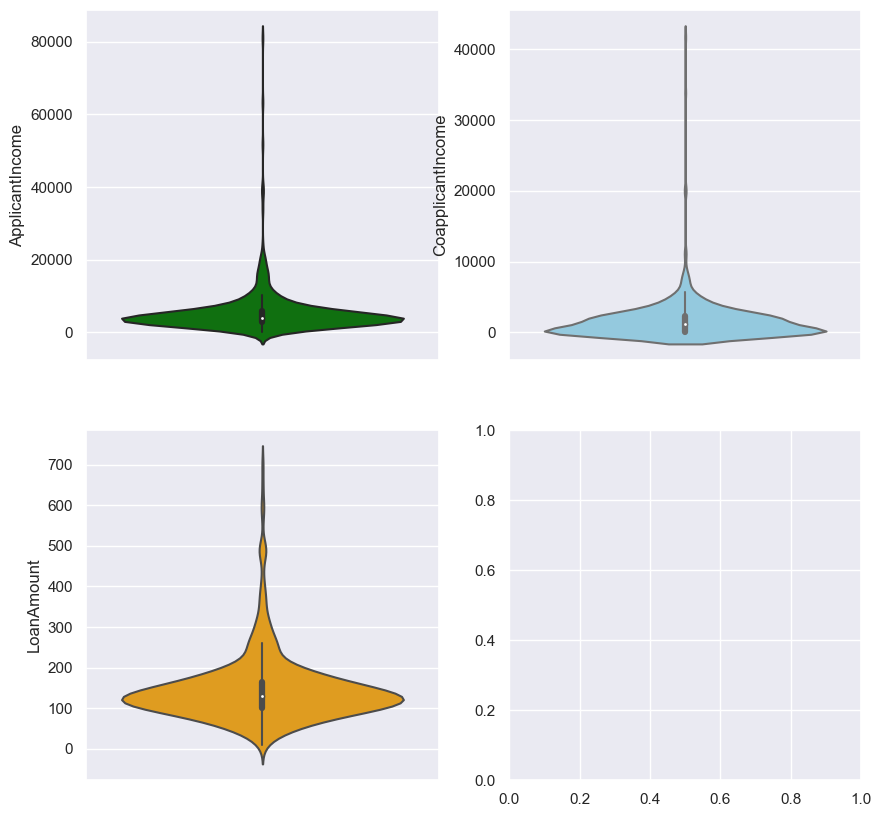

In [27]:
#Create a Violinplot with ApplicantIncome,CoapplicantIncome,LoanAmount
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=data, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=data, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=data, y="LoanAmount", ax=axs1[1, 0], color='orange');

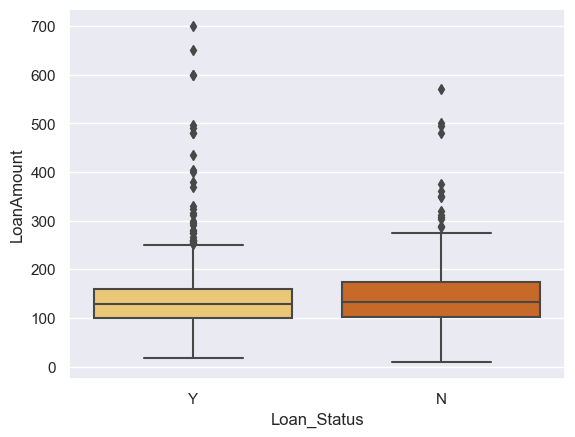

In [28]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=data, palette="YlOrBr");

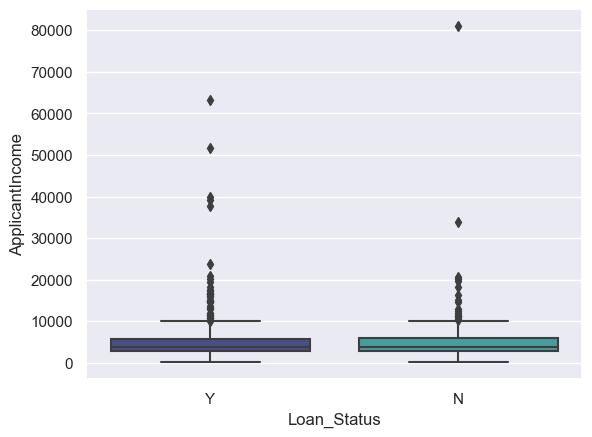

In [29]:
#Creat a box plot with loan_status and Applicantincome
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data, palette="mako");

In [30]:
countMarried = len(data[data.Married == 'Yes'])
countNotMarried = len(data[data.Married == 'No'])
countNull = len(data[data.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(data.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(data.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Married))*100)))

Percentage of married: 65.31%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.00%


In [31]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y


In [32]:
countcredit_history = len(data[data.Credit_History == 1.0])
countNotcredit_history = len(data[data.Credit_History == 0.0])
countfill_null_values_mean = len(data[data.Credit_History==0.84219858])

print("Percentage of Credit_History: {:.2f}%".format((countcredit_history / (len(data.Credit_History))*100)))
print("Percentage of Not Credit_History applicant: {:.2f}%".format((countNotcredit_history / (len(data.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countfill_null_values_mean / (len(data.Credit_History))*100)))

Percentage of Credit_History: 77.36%
Percentage of Not Credit_History applicant: 14.50%
Missing values percentage: 0.00%


## Machine Learning Modeling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [4]:
#Categorical columns in the data 
categorical=[col for col in data.columns if data[col].dtypes=='object']
categorical

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [5]:
#Convert the categorical columns into numerical using label encoder
for col in data.select_dtypes(include='object').columns:
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])
    print(f'{col} : {data[col].unique()}')

Loan_ID : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 

In [13]:
#Divided the data into indepedent and dependent variable
X=data.drop(['Loan_Status','Loan_ID'],axis=1)
y=data['Loan_Status']
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [14]:
#Split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=120)

In [24]:
print(X_train.shape)
print(y_train.shape)

(460, 11)
(460,)


The model accuracy score is 77.27
              precision    recall  f1-score   support

           0       0.96      0.41      0.58        58
           1       0.74      0.99      0.84        96

    accuracy                           0.77       154
   macro avg       0.85      0.70      0.71       154
weighted avg       0.82      0.77      0.74       154



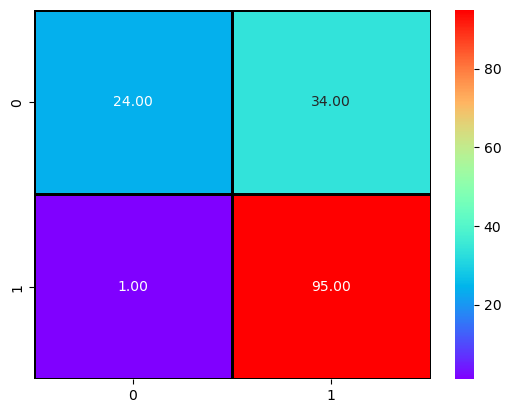

In [15]:
#Creat a function for model buliding 
def model_bulding(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'The model accuracy score is {accuracy_score(y_test,y_pred)*100:.2f}')
    print(classification_report(y_test,y_pred))
    confusion=confusion_matrix(y_test,y_pred)
    sns.heatmap(confusion,annot=True,cmap='rainbow',fmt='.2f',linewidths=1,linecolor='black')
#Checking the LogistiRegression model
logistic=LogisticRegression()
model_bulding(logistic,X_train,X_test,y_train,y_test)

The model accuracy score is 64.94
              precision    recall  f1-score   support

           0       0.54      0.45      0.49        58
           1       0.70      0.77      0.73        96

    accuracy                           0.65       154
   macro avg       0.62      0.61      0.61       154
weighted avg       0.64      0.65      0.64       154



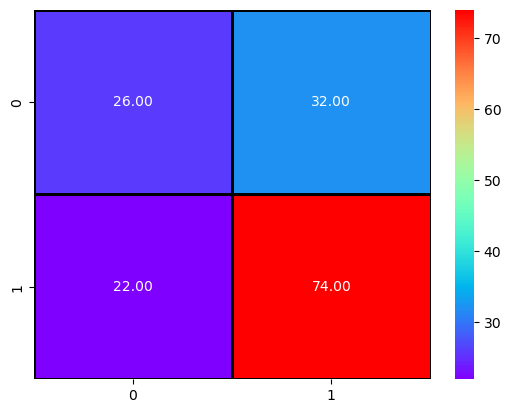

In [16]:
#Checking the DecisionTreeClassifier model
Decison=DecisionTreeClassifier()
model_bulding(Decison,X_train,X_test,y_train,y_test)

The model accuracy score is 76.62
              precision    recall  f1-score   support

           0       0.87      0.45      0.59        58
           1       0.74      0.96      0.84        96

    accuracy                           0.77       154
   macro avg       0.80      0.70      0.71       154
weighted avg       0.79      0.77      0.74       154



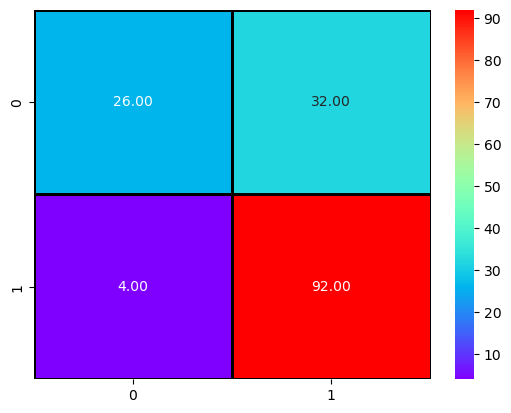

In [17]:
#Checking the RandomForestClassifier model
random=RandomForestClassifier()
model_bulding(random,X_train,X_test,y_train,y_test)

The model accuracy score is 77.27
              precision    recall  f1-score   support

           0       0.96      0.41      0.58        58
           1       0.74      0.99      0.84        96

    accuracy                           0.77       154
   macro avg       0.85      0.70      0.71       154
weighted avg       0.82      0.77      0.74       154



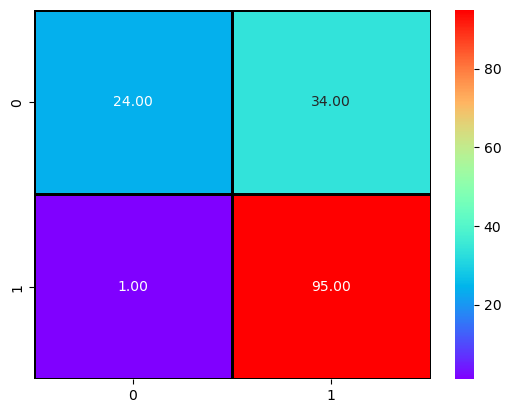

In [18]:
#Checking the KNeighborsClassifier model
knn=KNeighborsClassifier()
model_bulding(knn,X_train,X_test,y_train,y_test)

The model accuracy score is 74.68
              precision    recall  f1-score   support

           0       0.76      0.48      0.59        58
           1       0.74      0.91      0.82        96

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.73       154



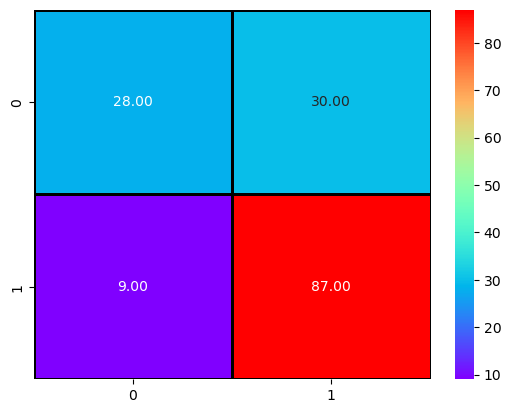

In [19]:
#Checking the XGBClassifier model
xgb=XGBClassifier()
model_bulding(xgb,X_train,X_test,y_train,y_test)

The model accuracy score is 77.27
              precision    recall  f1-score   support

           0       0.96      0.41      0.58        58
           1       0.74      0.99      0.84        96

    accuracy                           0.77       154
   macro avg       0.85      0.70      0.71       154
weighted avg       0.82      0.77      0.74       154



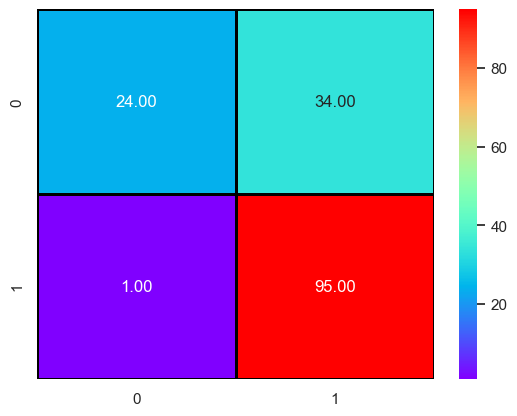

In [43]:
from sklearn.svm import SVC
svc=SVC()
model_bulding(svc,X_train,X_test,y_train,y_test)

## Hyperparameter turning with GridSearchCv

In [20]:
from sklearn.model_selection import GridSearchCV
#install the LogistiRegression model
logistic=LogisticRegression()
#param_grid
param_grid={
    'penalty':['l1','l2'],
    'dual':[True,False],
    'C':[0.05,0.06,0.08],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'n_jobs':[10,15,20,30]
    
    
}
#create grid_search object
grid_search=GridSearchCV(logistic,param_grid,cv=5,scoring='accuracy')
#fit the train data to the grid_seachcv
grid_search.fit(X_train,y_train)
#print the best_parms
print('GridSearchCv best params',grid_search.best_params_)

GridSearchCv best params {'C': 0.05, 'dual': False, 'n_jobs': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


The model accuracy score is 77.27
              precision    recall  f1-score   support

           0       0.96      0.41      0.58        58
           1       0.74      0.99      0.84        96

    accuracy                           0.77       154
   macro avg       0.85      0.70      0.71       154
weighted avg       0.82      0.77      0.74       154



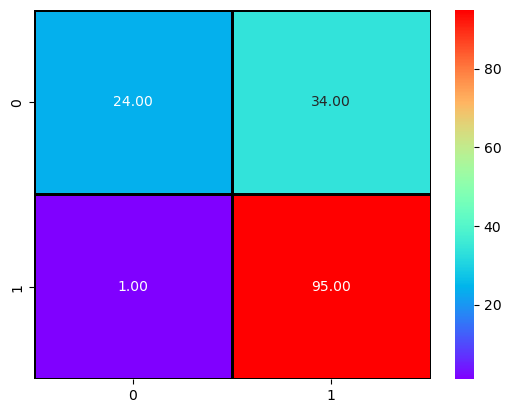

In [21]:
#Checking the LogistiRegression model
logistic_1=LogisticRegression(**{'C': 0.05, 'dual': False, 'n_jobs': 10, 'penalty': 'l2', 'solver': 'newton-cg'})
model_bulding(logistic_1,X_train,X_test,y_train,y_test)

In [46]:
#install the DecisionTreeClassifier model
Tree=DecisionTreeClassifier()
#param_grid
param_grid={
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':["best", "random"],
    'max_depth':[10,20,25,30,50],
    'max_features' : ["auto", "sqrt", "log2"],
    'max_leaf_nodes':[5,10,15,20,25]
    
    
}
#create grid_search object
grid_search=GridSearchCV(Tree,param_grid,cv=5,scoring='accuracy')
#fit the train data to the grid_seachcv
grid_search.fit(X_train,y_train)
#print the best_parms
print('GridSearchCv best params',grid_search.best_params_)

GridSearchCv best params {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'splitter': 'random'}


The model accuracy score is 77.27
              precision    recall  f1-score   support

           0       0.96      0.41      0.58        58
           1       0.74      0.99      0.84        96

    accuracy                           0.77       154
   macro avg       0.85      0.70      0.71       154
weighted avg       0.82      0.77      0.74       154



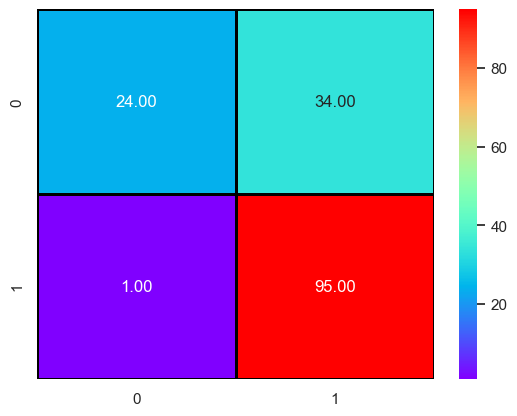

In [47]:
#Checking the DecisionTreeClassifier model
Decison_1=DecisionTreeClassifier(**{'criterion': 'gini', 'max_depth': 25, 'max_features': 'log2', 'max_leaf_nodes': 5, 'splitter': 'random'})
model_bulding(Decison_1,X_train,X_test,y_train,y_test)

In [ ]:
#install the DecisionTreeClassifier model
random=RandomForestClassifier()
#param_grid
param_grid={
    'n_estimators':[10,20,30],
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth':[10,20,25,30,50],
    'min_samples_split' : [10,15,20,25.0],
    'min_samples_leaf':[5,10,15,20,21.2],
    'max_features':["auto", "sqrt", "log2"],
    'class_weight':["balanced"]
    
    
}
#create grid_search object
grid_search=GridSearchCV(random,param_grid,cv=5,scoring='accuracy')
#fit the train data to the grid_seachcv
grid_search.fit(X_train,y_train)
#print the best_parms
print('GridSearchCv best params',grid_search.best_params_)

In [ ]:
#Checking the RandomForestClassifier model
random_1=RandomForestClassifier(**{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 20})
model_bulding(random_1,X_train,X_test,y_train,y_test)

In [25]:
import pickle
pickle.dump(knn, open('knn.pkl', 'wb'))

In [ ]:
This is the data for predict the loan_status based on the some columns such as gender and education etc.
we do asuseval process for data preprocessing such data cleaning, fill the null values with mean and mode.
Then we do some EDA process with data.we create bar and pie and histogram to understand the values in the data.
Also we use groubpy function find the average loan amount with gender wise and education wise in the same way we ask
the differnt question to the data.once we done the project then move to the machine learning model.
we do feature engnerring do convert the categorical column into numerical then split the data into tain and test 
once we divided into data then apply diifernet classification machine learning alogrithmns.Then we apply the
Hyperparameter turning with Gridsearch aprt from that logisticregression get 78% accuracy_score.